## Projektna naloga

Podatkovno rudarjenje, naloga, `DATUM`  
**`Metod Zupančič`**

### Podatki

### Vprašanja

#### 31.3.2020
1. Keri filmi so najboljši?
2. Predstavitev žanrov, histogram žanrov - Metod
3. Nek scatter plot, cena v odvisnosti od časa +dodatno(odvisnosti na karkoli drugega zanimivega)
4. Najbolj popularni developerji



In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import re

csfont = {'fontname':'Microsoft YaHei'} #kitajski font

description = pd.read_csv("Data/steam_description_data.csv")
media = pd.read_csv("Data/steam_media_data.csv")
requirements = pd.read_csv("Data/steam_requirements_data.csv")
support = pd.read_csv("Data/steam_support_info.csv")
steam = pd.read_csv("Data/steam.csv")
tag = pd.read_csv("Data/steamspy_tag_data.csv")

### 2. Predstavitev žanrov, histogram žanrov - Metod

In [2]:
steam = pd.read_csv("Data/steam.csv")
genres = dict()

#Brez omejevanja po lastništvu
for vnos in steam.genres:
    for x in vnos.split(";"):
        if x not in genres:
            genres[x] = 1
        else:
            genres[x] += 1

genres = dict(sorted(genres.items(), key=lambda k: -k[1]))

stevec = len(steam)
print("Vsi vnosi:",stevec)
omejeno = steam.loc[~steam['owners'].str.contains('^0-', regex=True)]
stevec = stevec - len(omejeno)
print("Število vnosov z najmanjšo vrednostjo vsebovanja:",stevec)
print("Preostanek uporabnih podatkov:",len(omejeno))
genresLimited = dict()

for vnos in omejeno.genres:
    for x in vnos.split(";"):
        if x not in genresLimited:
            genresLimited[x] = 1
        else:
            genresLimited[x] += 1
genresLimited = dict(sorted(genresLimited.items(), key=lambda k: -k[1]))

Vsi vnosi: 27075
Število vnosov z najmanjšo vrednostjo vsebovanja: 18596
Preostanek uporabnih podatkov: 8479


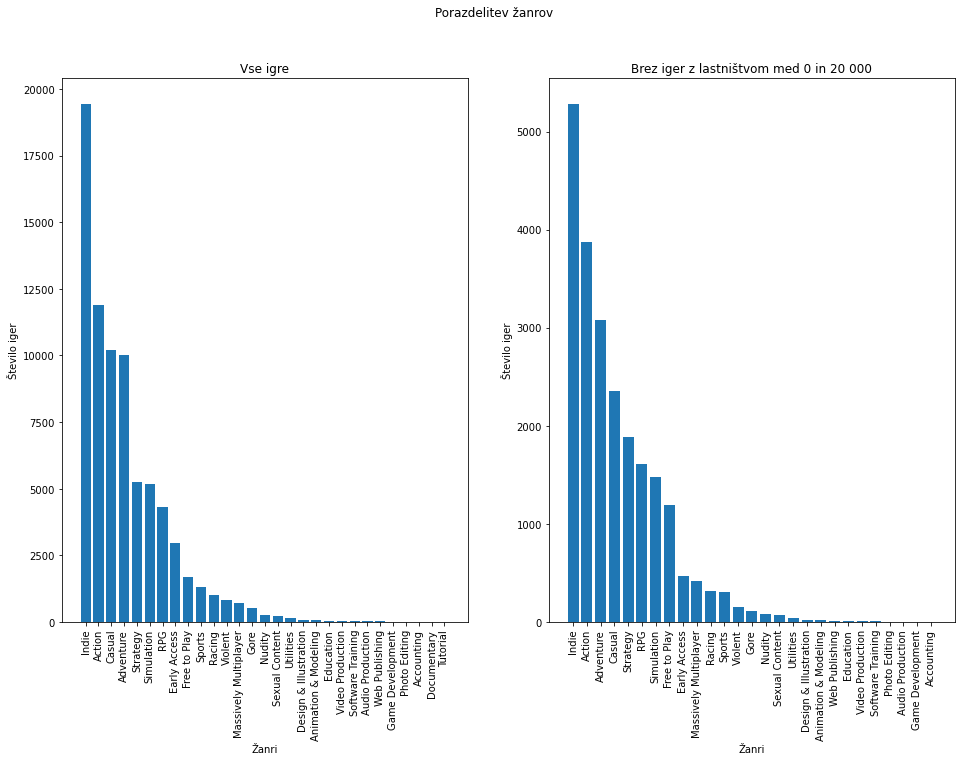

In [3]:
import matplotlib.pyplot as plt
zaVizualizacijo = {k: v for k, v in sorted(genres.items(), key=lambda item: -item[1])}
plt.figure(num=None, figsize=(16,10), facecolor='w', edgecolor='k')
plt.suptitle("Porazdelitev žanrov")
plt.subplot(1,2,1)
plt.bar(range(len(genres)), list(genres.values()), align='center')
plt.xticks(range(len(genres)), list(genres.keys()),rotation=90)
plt.xlabel("Žanri")
plt.ylabel("Število iger")
plt.title("Vse igre")

plt.subplot(1,2,2)
zaVizualizacijo = {k: v for k, v in sorted(genresLimited.items(), key=lambda item: -item[1])}
#plt.figure(num=None, figsize=(20,10), dpi=70, facecolor='w', edgecolor='k')
plt.bar(range(len(genresLimited)), list(genresLimited.values()), align='center')
plt.xticks(range(len(genresLimited)), list(genresLimited.keys()),rotation=90)
plt.xlabel("Žanri")
plt.ylabel("Število iger")
plt.title("Brez iger z lastništvom med 0 in 20 000")
plt.show()

In [4]:
#ZAPISKI RANDOM
# Inplace=true  je da ne rabiš delat steam = (popravljen steam)
# Negacija je ~
# za uporabo regexa importaj modul re, dodaten flag za velika male = flag=Re.I -> Ignore case
import re
steam = pd.read_csv("Data/steam.csv")
#steam = steam.loc[~steam['owners'].str.contains('^0-', regex=True)]

In [5]:
#Kaj če me zanima firma in njen naklon določenim žanrom
#bestDevelopers = steam.groupby("developer").sum().sort_values(["count","positive_ratings","negative_ratings"],ascending=[False,False,True]).head(10)
# print(steam.head(5))
#steam = steam.drop(columns=['count'])
#steam["count"] = 1
#steam.groupby("developer").count().sort_values(["count"],ascending=False).head(10)


In [6]:
#Pretvorba iz string(spodnjeSt-zgornjeSt) v int(povprečje(spodnjeSt,zgornjeSt))
steam = pd.read_csv("Data/steam.csv")
for index, row in steam.iterrows():
    prvi, drugi = row["owners"].split("-")
    steam.loc[index, "owners"] = pd.to_numeric((pd.to_numeric(prvi) + pd.to_numeric(drugi))//2)   


Text(0.5, 1.0, 'Najboljših 50 iger po številu lastnikov iger')

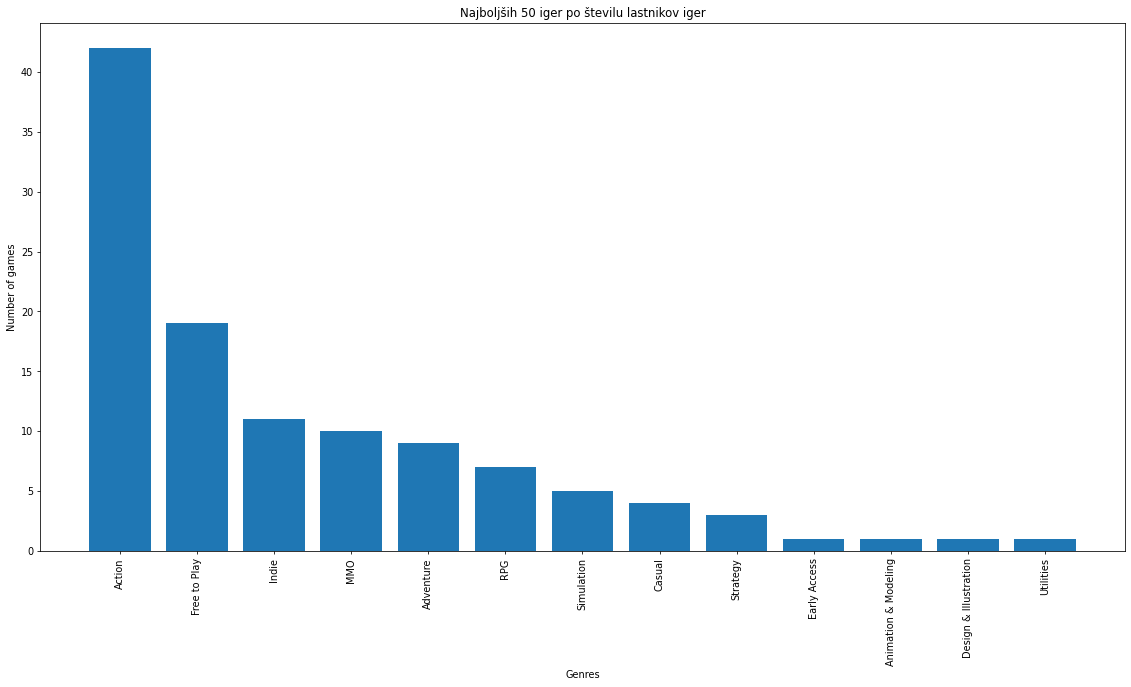

In [7]:
stIger=50
najboljsih20 = steam[["name","developer","owners","genres"]].sort_values("owners",ascending=False).head(stIger)
top20_genres = dict()
for index,row in najboljsih20.iterrows():
    for genre in row["genres"].split(";"):
        if genre in top20_genres:
            top20_genres[genre] += 1
        else:
            top20_genres[genre] = 1
top20_genres["MMO"] = top20_genres["Massively Multiplayer"]
top20_genres.pop("Massively Multiplayer")
top20_genres = dict(sorted(top20_genres.items(), key=lambda k: -k[1]))

import matplotlib.pyplot as plt
zaVizualizacijo = {k: v for k, v in sorted(top20_genres.items(), key=lambda item: -item[1])}
plt.figure(num=None, figsize=(20,10), dpi=70, facecolor='w', edgecolor='k')
plt.bar(range(len(top20_genres)), list(top20_genres.values()), align='center')
plt.xticks(range(len(top20_genres)), list(top20_genres.keys()),rotation=90)
plt.xlabel("Genres")
plt.ylabel("Number of games")
plt.title("Najboljših %d iger po številu lastnikov iger"%stIger)

### Razno popravljanje podatkov

In [8]:
#Prepis "positive_ratings" in "negative_ratings" v "ratings"
steam["ratings"] = steam["positive_ratings"]/(steam["positive_ratings"]+steam["negative_ratings"])
steam = steam.drop(columns=["positive_ratings","negative_ratings"])

In [9]:
for index,row in steam.iterrows():
    for platforma in row["platforms"].split(";"):
        
        if(platforma == "windows"):
            steam.loc[index, "windows"] = np.int(1)
        else:
            steam.loc[index, "windows"] = np.int(0)
        
        if(platforma == "mac"):
            steam.loc[index, "mac"] = np.int(1)
        else:
            steam.loc[index, "mac"] = np.int(0)

        if(platforma == "linux"):
            steam.loc[index, "linux"] = np.int(1)
        else:
            steam.loc[index, "linux"] = np.int(0)
steam.drop(columns=["platforms"])

,appid,name,release_date,english,developer,publisher,required_age,categories,genres,steamspy_tags,achievements,average_playtime,median_playtime,owners,price,ratings,windows,mac,linux
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,17612,317,15000000,7.19,0.973888,0.0,0.0,1.0
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,277,62,7500000,3.99,0.839787,0.0,0.0,1.0
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,187,34,7500000,3.99,0.895648,0.0,0.0,1.0
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,258,184,7500000,3.99,0.826623,0.0,0.0,1.0
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,624,415,7500000,3.99,0.947996,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,0,0,10000,2.09,1.000000,1.0,0.0,0.0
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,0,0,10000,1.69,0.888889,1.0,0.0,0.0
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,0,10000,3.99,0.000000,1.0,0.0,0.0
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,0,0,10000,5.19,1.000000,0.0,1.0,0.0


In [10]:
#Tryout korelacija z seaborn modulom
# import seaborn as sns
# sns.heatmap(steam.corr())
steam.loc[steam["required_age"] > 0]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,average_playtime,median_playtime,owners,price,ratings,windows,mac,linux
46,2210,Quake IV,2011-08-04,1,RavenSoft / id Software,Bethesda Softworks,windows,18,Single-player;Multi-player;Steam Cloud,Action,FPS;Action;Shooter,0,36,32,350000,12.99,0.838983,1.0,0.0,0.0
132,4560,Company of Heroes - Legacy Edition,2007-07-17,1,Relic Entertainment,SEGA,windows,18,Single-player;Multi-player;Steam Trading Cards...,Violent;Action;Strategy,Strategy;RTS;World War II,0,175,186,3500000,0.00,0.937156,1.0,0.0,0.0
133,4570,"Warhammer® 40,000: Dawn of War® - Game of the ...",2007-08-07,1,Relic Entertainment,SEGA,windows,16,Single-player;Multi-player;Steam Trading Cards...,Strategy,Strategy;Warhammer 40K;RTS,0,309,340,1500000,9.99,0.944189,1.0,0.0,0.0
134,4580,"Warhammer® 40,000: Dawn of War® - Dark Crusade",2007-08-07,1,Relic Entertainment,SEGA,windows,16,Single-player;Multi-player;Steam Cloud,Strategy,Strategy;Warhammer 40K;RTS,0,543,620,1500000,9.99,0.955399,1.0,0.0,0.0
136,4720,Condemned: Criminal Origins,2012-10-29,1,Monolith,SEGA,windows,18,Single-player,Action,Horror;Action;Atmospheric,0,312,312,350000,9.99,0.849044,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26707,1032560,Faux,2019-03-18,1,Pelagames,Pelagames,windows,12,Single-player;Steam Achievements;Partial Contr...,Action;Indie,Action;Indie;Gore,10,0,0,10000,2.09,0.750000,1.0,0.0,0.0
26728,1034440,Roach Killer,2019-04-15,1,Highlight Visual Effects Development,Highlight Visual Effects Development,windows,16,Single-player;Steam Achievements;Steam Leaderb...,Action;Adventure;Indie;Simulation,Action;Indie;Simulation,1,0,0,10000,4.79,0.333333,1.0,0.0,0.0
26732,1034830,oscar and paul,2019-03-15,1,NGS GAMES STUDIO;PIXEL ART GAME,NGS GAMES STUDIO,windows,12,Single-player,Action;Adventure;Casual;Indie,Action;Indie;Casual,0,0,0,10000,0.79,0.000000,1.0,0.0,0.0
26983,1052480,Adecke - Cards Games Deluxe,2019-04-20,1,Philippe Pelchat,Philippe Pelchat,windows;mac;linux,12,Single-player,Casual,Casual,0,0,0,10000,7.19,0.750000,0.0,0.0,1.0


(array([ 668.,    4.,   13.,   18.,   31.,   90.,   82.,   45.,  164.,
          74.,  273.,  197.,  134.,  454.,  212.,  281.,  422.,  395.,
         407.,  272., 1209.,  494.,  632.,  828.,  513.,  812., 1226.,
         939.,  937.,  908., 1354., 1035., 1521., 1301., 1227., 1382.,
        1349., 1183.,  856., 3133.]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
        0.9  , 0.925, 0.95 , 0.975, 1.   ]),
 <a list of 40 Patch objects>)

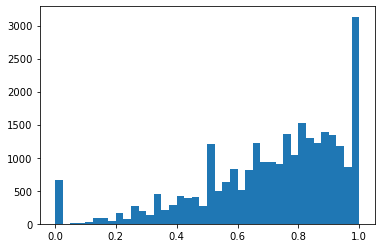

In [11]:
plt.hist(steam[steam.owners > 100].ratings, bins=40)

In [12]:
def buildSteamDataframe(originalDataFrame):
    mySteam = originalDataFrame.copy()
    #Rating -> pistive r / all r
    mySteam["rating"] = mySteam["positive_ratings"]/(mySteam["positive_ratings"]+mySteam["negative_ratings"])
    mySteam["reviews"] = (mySteam["positive_ratings"]+mySteam["negative_ratings"])
    #Razdelitev leta na leto in mesec (dan zbrišemo)
    mySteam[["release_year","release_month","release_day"]] = mySteam.release_date.str.split("-",expand=True,)
    #owners -> (min own. + max own) /2
    mySteam["owners"] = [ pd.to_numeric((pd.to_numeric(row["owners"].split("-")[0]) + pd.to_numeric(row["owners"].split("-")[1]))//2)  for index, row in mySteam.iterrows()]
    #delete nepotrebne podatke
    mySteam = mySteam.drop(columns=["release_date","release_day","required_age","achievements","positive_ratings","negative_ratings","english"])
    return mySteam

In [35]:
steam = pd.read_csv("Data/steam.csv")
steam = buildSteamDataframe(steam)

In [93]:
#get groups by categories
steam

,appid,name,developer,publisher,platforms,categories,genres,steamspy_tags,average_playtime,median_playtime,owners,price,rating,reviews,release_year,release_month
0,10,Counter-Strike,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,17612,317,15000000,7.19,0.973888,127873,2000,11
1,20,Team Fortress Classic,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,277,62,7500000,3.99,0.839787,3951,1999,04
2,30,Day of Defeat,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,187,34,7500000,3.99,0.895648,3814,2003,05
3,40,Deathmatch Classic,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,258,184,7500000,3.99,0.826623,1540,2001,06
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,624,415,7500000,3.99,0.947996,5538,1999,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,SHEN JIAWEI,SHEN JIAWEI,windows,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,0,0,10000,2.09,1.000000,3,2019,04
27071,1065570,Cyber Gun,Semyon Maximov,BekkerDev Studio,windows,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,0,10000,1.69,0.888889,9,2019,04
27072,1065650,Super Star Blast,EntwicklerX,EntwicklerX,windows,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,0,0,10000,3.99,0.000000,1,2019,04
27073,1066700,New Yankee 7: Deer Hunters,Yustas Game Studio,Alawar Entertainment,windows;mac,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,0,10000,5.19,1.000000,2,2019,04


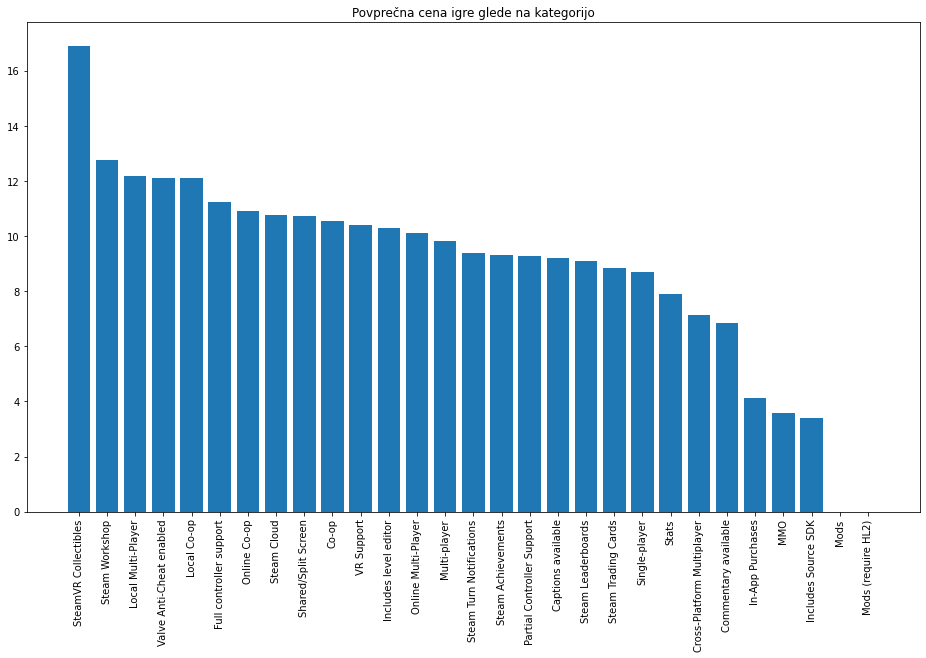

In [267]:
#FilteredSteam vsebuje samo igre, ki so imele vsaj 100 ocen
filteredSteam = steam[steam["reviews"] > 100]
categories = dict()
counterCategory = dict()
for index, row in filteredSteam.iterrows():
    splitCategories = row["categories"].split(";")
    price = row["price"]
    for value in splitCategories:
        if(value not in categories):
            categories[value] = price
            counterCategory[value] = 1
        else:
            categories[value] += price
            counterCategory[value] += 1
for key in categories.keys():
    categories[key] /= counterCategory[key]
plt.figure(figsize=(16,9),facecolor="w")
plt.bar(dict(sorted(categories.items(), key= lambda y:-y[1])).keys(), dict(sorted(categories.items(), key= lambda y:-y[1])).values())
plt.xticks(rotation=90)
plt.title("Povprečna cena igre glede na kategorijo")
plt.show()

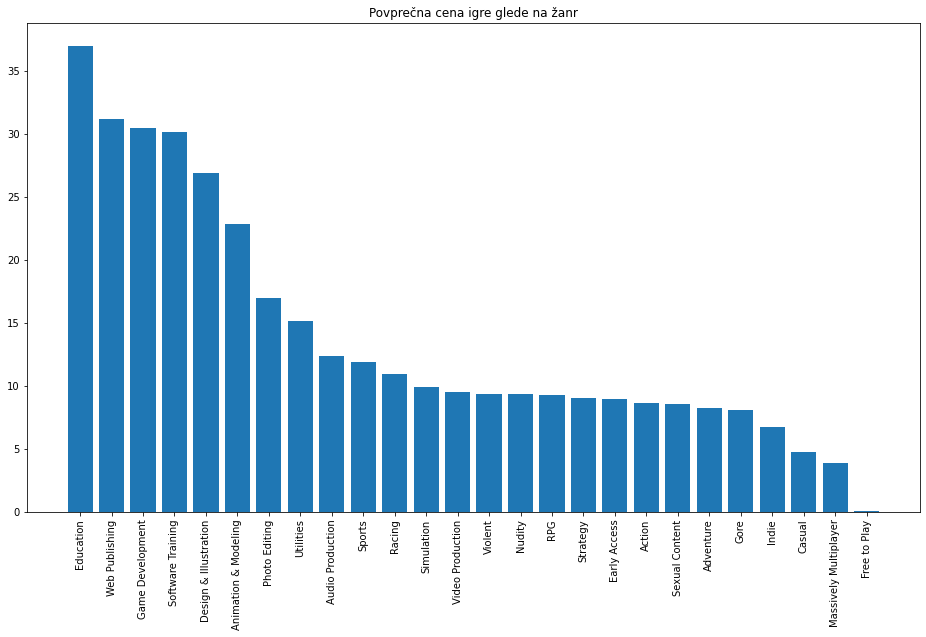

In [268]:
#FilteredSteam vsebuje samo igre, ki so imele vsaj 100 ocen
filteredSteam = steam[steam["reviews"] > 100]
genres = dict()
counterGenre = dict()
for index, row in filteredSteam.iterrows():
    splitGenres = row["genres"].split(";")
    price = row["price"]
    for value in splitGenres:
        if(value not in genres):
            genres[value] = price
            counterGenre[value] = 1
        else:
            genres[value] += price
            counterGenre[value] += 1
for key in genres.keys():
    genres[key] /= counterGenre[key]

plt.figure(figsize=(16,9),facecolor="w")
plt.bar(dict(sorted(genres.items(), key= lambda y:-y[1])).keys(), dict(sorted(genres.items(), key= lambda y:-y[1])).values())
plt.xticks(rotation=90)
plt.title("Povprečna cena igre glede na žanr")
plt.show()

In [270]:
#FilteredSteam vsebuje samo igre, ki so imele vsaj 100 ocen
filteredSteam = steam[steam["reviews"] > 100]
for x in genres:
    print("\"%s\":\n"%x,filteredSteam[filteredSteam["genres"].str.contains(x)].agg({"price" : ["max","min"]}),"\n")

"Action":
      price
max  54.99
min   0.00 

"Free to Play":
      price
max  19.99
min   0.00 

"Strategy":
      price
max  60.99
min   0.00 

"Adventure":
      price
max  49.99
min   0.00 

"Indie":
      price
max  44.99
min   0.00 

"RPG":
      price
max  49.99
min   0.00 

"Animation & Modeling":
      price
max  78.99
min   0.00 

"Video Production":
      price
max  46.49
min   0.00 

"Simulation":
      price
max  60.99
min   0.00 

"Racing":
      price
max  49.99
min   0.00 

"Casual":
      price
max  41.99
min   0.00 

"Violent":
      price
max  49.99
min   0.00 

"Massively Multiplayer":
      price
max  49.99
min   0.00 

"Nudity":
      price
max  49.99
min   0.00 

"Sports":
      price
max  44.99
min   0.00 

"Early Access":
      price
max  34.99
min   0.00 

"Gore":
      price
max  49.99
min   0.00 

"Design & Illustration":
      price
max  78.99
min   0.00 

"Web Publishing":
      price
max  75.99
min   0.00 

"Education":
      price
max  78.99
min   0.00 


In [262]:
print("Vrednosti najdražjega žanra:\n",steam[steam["genres"].str.contains("Game Development")].agg({"price" : ["mean","max","min"]}),"\n")
print("Vrednosti drugega najdražjega žanra:\n",steam[steam["genres"].str.contains("Web Publishing")].agg({"price" : ["mean","max","min",]}))

Vrednosti najdražjega žanra:
        price
mean   61.68
max   303.99
min     0.00 

Vrednosti drugega najdražjega žanra:
            price
mean   39.696071
max   303.990000
min     0.000000


Text(0.5, 1.0, 'Porazdelitev ocen od 1 do 10')

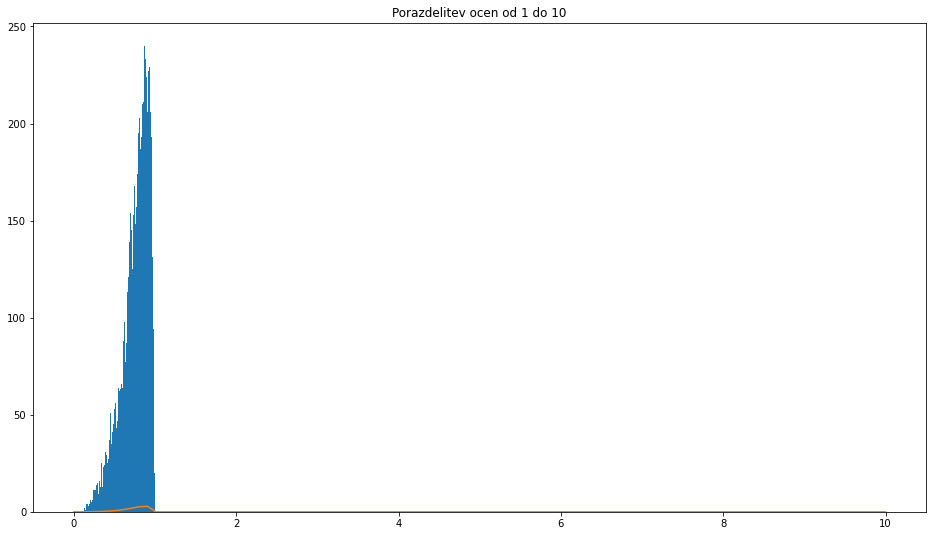

In [293]:

parameters = beta.fit(steam[steam.reviews > 100].rating)
xr = np.linspace(0, 10, 100) 
P_fit = [beta.pdf(x, *parameters) for x in xr ]
plt.hist(steam[steam.reviews > 100].rating, bins=100)
plt.plot(xr, P_fit)
plt.title("Porazdelitev ocen od 1 do 10")

0.7598310048823581

Text(0.5, 1.0, 'Prileganje beta in normalne porazdelitve dejanski porazdelitvi ocen')

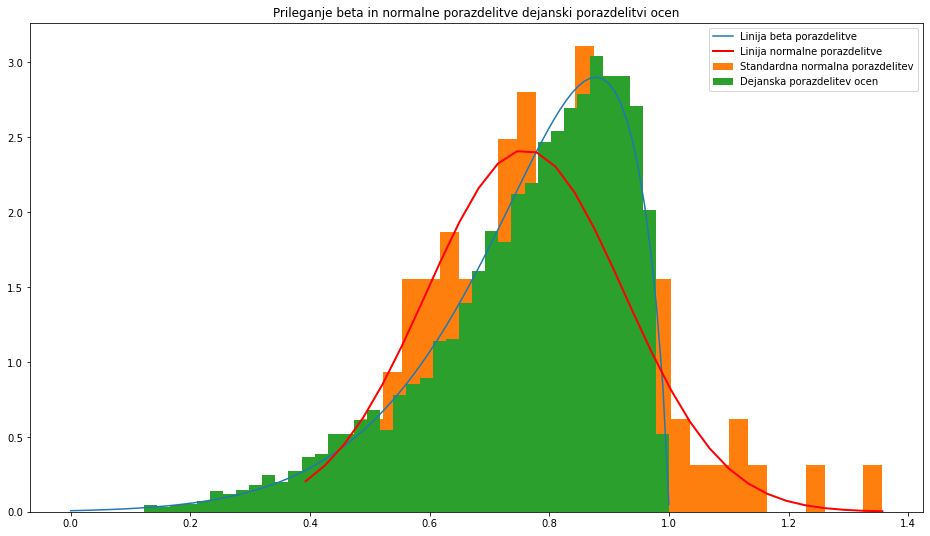

In [320]:
from scipy.stats import beta, norm
plt.figure(figsize=(16,9),facecolor="w")

parameters = beta.fit(steam[steam.reviews > 100].rating)
xr = np.linspace(0, 1, 100) 
P_fit = [beta.pdf(x, *parameters) for x in xr ]
plt.plot(xr, P_fit, label="Linija beta porazdelitve")

mean, std = steam[steam.reviews > 100].rating.agg(["mean","std"])
s = np.random.normal(mean, std, 100)
count, bins, ignored = plt.hist(s, 30, density=True, label="Standardna normalna porazdelitev")
plt.plot(bins, 1/(stdev * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * stdev**2) ),linewidth=2, color='r',label="Linija normalne porazdelitve")

plt.hist(steam[steam.reviews > 100].rating, density=True,bins=40, label="Dejanska porazdelitev ocen")
plt.legend()

plt.title("Prileganje beta in normalne porazdelitve dejanski porazdelitvi ocen")